# Task-4
**Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

Sample Dataset :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn  as sns

In [5]:
cols=['TweetID', 'Topic', 'Target', 'Text']

train_data=pd.read_csv("Data/twitter_training.csv", names = cols)
valid_data=pd.read_csv("Data/twitter_validation.csv", names = cols)

In [6]:
train_data

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
valid_data

,TweetID,Topic,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [8]:
train_data.head()

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
valid_data.head()

,TweetID,Topic,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [12]:
dataset = pd.concat([train_data, valid_data], ignore_index = False)
dataset

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:
dataset.isna().sum()

TweetID      0
Topic        0
Target       0
Text       686
dtype: int64

In [16]:
dataset=dataset.dropna()

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74996 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TweetID  74996 non-null  int64 
 1   Topic    74996 non-null  object
 2   Target   74996 non-null  object
 3   Text     74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [25]:
pd.Series(dataset["Topic"].unique())

0                           Borderlands
1             CallOfDutyBlackopsColdWar
2                                Amazon
3                             Overwatch
4                         Xbox(Xseries)
5                                 NBA2K
6                                 Dota2
7                     PlayStation5(PS5)
8                          WorldOfCraft
9                                 CS-GO
10                               Google
11                       AssassinsCreed
12                          ApexLegends
13                      LeagueOfLegends
14                             Fortnite
15                            Microsoft
16                          Hearthstone
17                          Battlefield
18    PlayerUnknownsBattlegrounds(PUBG)
19                              Verizon
20                            HomeDepot
21                                 FIFA
22               RedDeadRedemption(RDR)
23                           CallOfDuty
24                 TomClancysRainbowSix


In [20]:
# Group by Topic and Target
senti_counts = dataset.groupby(['Topic', 'Target']).size().reset_index(name='counts')
senti_counts.head()

,Topic,Target,counts
0,Amazon,Irrelevant,189
1,Amazon,Negative,581
2,Amazon,Neutral,1225
3,Amazon,Positive,315
4,ApexLegends,Irrelevant,195


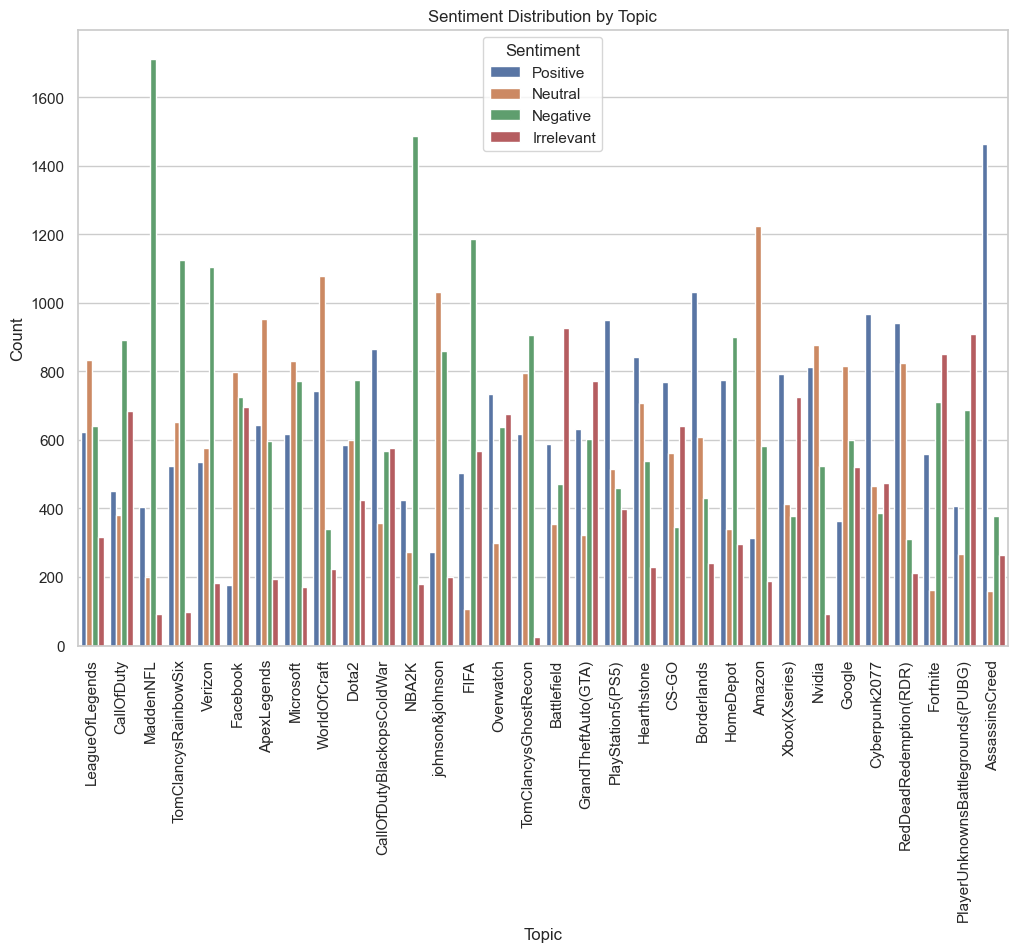

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.countplot(data=dataset, x="Topic", hue="Target", order=dataset["Topic"].value_counts().index)
plt.title("Sentiment Distribution by Topic")
plt.xticks(rotation=90)
plt.xlabel("Topic")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()

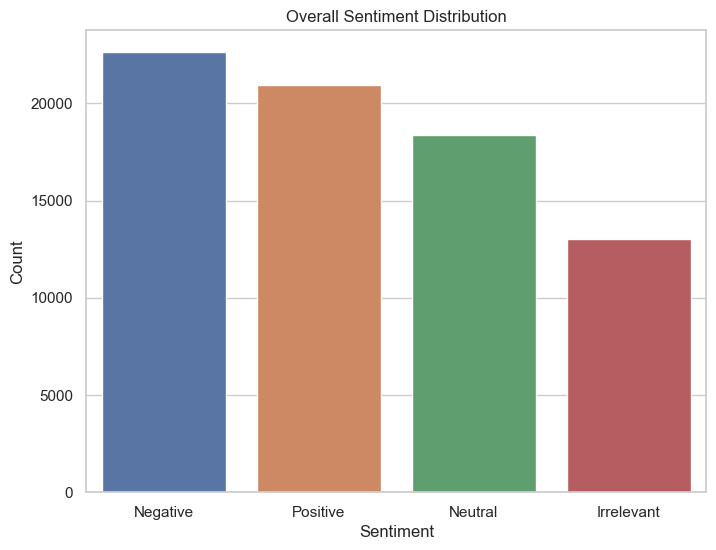

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x="Target", order=dataset["Target"].value_counts().index)
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [27]:
text = dataset['Text']
text

0      im getting on borderlands and i will murder yo...
1      I am coming to the borders and I will kill you...
2      im getting on borderlands and i will kill you ...
3      im coming on borderlands and i will murder you...
4      im getting on borderlands 2 and i will murder ...
                             ...                        
995    ⭐️ Toronto is the arts and culture capital of ...
996    tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997    Today sucked so it’s time to drink wine n play...
998    Bought a fraction of Microsoft today. Small wins.
999    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 74996, dtype: object

In [29]:
dataset.loc[:, 'Text'] = dataset['Text'].astype(str)

In [30]:
l = []
text = dataset['Text']

for t in text:
    if type(t) not in l:
        l.append(type(t))
print(l) 

[<class 'str'>]


In [31]:
!pip install nltk
from nltk.tokenize import word_tokenize

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 378.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 660.6 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.5 MB 656.4 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.5 MB 655.4 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 722.1 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.5 MB 748.1 kB/s eta 0:00:02
   ----- ---

In [39]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
first_text = dataset['Text'].iloc[0]
print(first_text, len(first_text), type(word_tokenize(first_text)))
tokens = word_tokenize(first_text)
print(tokens)

im getting on borderlands and i will murder you all , 53 <class 'list'>
['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all', ',']


In [40]:
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
import re
from nltk.tokenize import word_tokenize

modified_text = []

rows = len(text)

for ithText in dataset['Text']:
    
    ithText = ithText.lower()  
    ithText = re.sub(r'[^\w\s]', '', ithText)
    ithText = re.sub(r'\d+', '', ithText)
    
    
    tokens = word_tokenize(ithText)  
    words = set(stopwords.words('english'))
    doc = [word for word in tokens if word not in words]
    finalText = ' '.join(doc)
    modified_text.append(finalText)  

print(modified_text[1:3])

['coming borders kill', 'im getting borderlands kill']


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [73]:
# Split dataset into features (X) and target (y)
X = dataset.drop(['TweetID'], axis=1)  # Dropping 'TweetID' as it is not needed for modeling
y = dataset['Target']

In [74]:
# Define categorical and text features
categorical_features = ['Topic']
text_feature = 'Text'

In [75]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('text', TfidfVectorizer(max_features=1000), text_feature)
    ],
    remainder='drop'
)

In [77]:
# Create pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [78]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Fit the pipeline (preprocessing and classifier)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Topic']),
                                                 ('text',
                                                  TfidfVectorizer(max_features=1000),
                                                  'Text')])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [80]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics (classification report)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       1.00      1.00      1.00      2666
    Negative       1.00      1.00      1.00      4464
     Neutral       1.00      1.00      1.00      3706
    Positive       1.00      1.00      1.00      4164

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

